In [2]:
!pip install pandas

     ---------------------------------------- 10.5/10.5 MB 4.0 MB/s eta 0:00:00
     -------------------------------------- 504.7/504.7 kB 2.1 MB/s eta 0:00:00



[notice] A new release of pip available: 22.2.1 -> 22.2.2
[notice] To update, run: C:\Users\ARLab\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [9]:
#read the csv
import pandas as pd
import numpy as np

data = pd.read_csv("SSMEditData.csv")
data


,No,Distance,Vr OriSSM,Vr ModSSM,Mode Ori SSM,Mode ModeSSM
0,1,1939.31,200,200.0,1,1
1,2,2025.89,200,200.0,1,1
2,3,2132.35,200,200.0,1,1
3,4,2132.35,200,200.0,1,1
4,5,2036.24,200,200.0,1,1
...,...,...,...,...,...,...
451,452,3697.50,200,200.0,1,1
452,453,3697.50,200,200.0,1,1
453,454,3697.50,200,200.0,1,1
454,455,3697.50,200,200.0,1,1


In [10]:
#data frame selection
selectData = data[["No", "Distance", "Vr OriSSM", "Vr ModSSM"]]
selectData = data.iloc[0:200, 0:4]

In [5]:
selectData

,No,Distance,Vr OriSSM,Vr ModSSM
0,1,1939.31,200,200.0
1,2,2025.89,200,200.0
2,3,2132.35,200,200.0
3,4,2132.35,200,200.0
4,5,2036.24,200,200.0
...,...,...,...,...
195,196,3697.50,200,200.0
196,197,3697.50,200,200.0
197,198,3697.50,200,200.0
198,199,3697.50,200,200.0


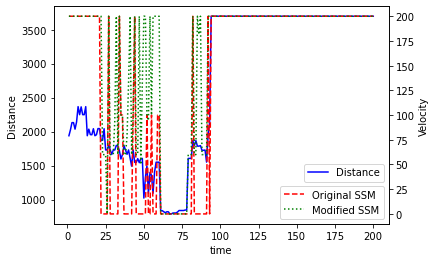

In [11]:
# combine two image
import matplotlib.pyplot as plt
import pylab
import numpy as np

x = selectData["No"].to_numpy()
y1 = selectData["Distance"].to_numpy()
y2 = selectData["Vr OriSSM"].to_numpy()
y3 = selectData["Vr ModSSM"].to_numpy()

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(x, y1,'b')
ax2.plot(x, y2,'--r')
ax2.plot(x, y3,':g')

ax1.set_xlabel('time')
ax1.set_ylabel('Distance')
ax2.set_ylabel('Velocity')

ax1.legend(['Distance'], loc='upper right', bbox_to_anchor=(1, 0.3))
ax2.legend(['Original SSM', 'Modified SSM'], loc = 'lower right')

plt.show()

#pylab.plot(x, y1, '-b', label = 'Distance')
#pylab.plot(x, y2, '-r', label = 'Vr Original SSM')
#pylab.plot(x, y3, '--g', label = 'Vr Modified SSM')
#pylab.legend(loc = 'upper right')


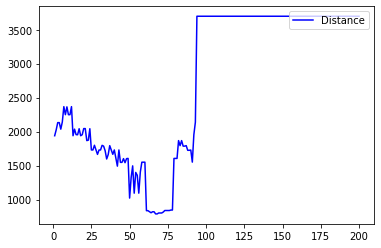

In [21]:
import matplotlib.pyplot as plt
import pylab
import numpy as np

x = selectData["No"].to_numpy()
y1 = selectData["Distance"].to_numpy()
y2 = selectData["Vr OriSSM"].to_numpy()
y3 = selectData["Vr ModSSM"].to_numpy()

pylab.plot(x, y1, '-b', label = 'Distance')
#pylab.plot(x, y2, '-r', label = 'Vr Original SSM')
#pylab.plot(x, y3, '--g', label = 'Vr Modified SSM')
pylab.legend(loc = 'upper right')
pylab.savefig('distance_matplot.png')

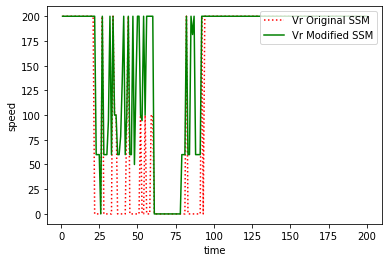

In [8]:
plt.xlabel('time')
plt.ylabel('speed')

pylab.plot(x, y2, ':r', label = 'Vr Original SSM')
pylab.plot(x, y3, 'g', label = 'Vr Modified SSM')
pylab.legend(loc = 'upper right')

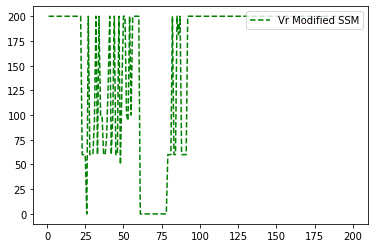

In [46]:
pylab.plot(x, y3, '--g', label = 'Vr Modified SSM')
pylab.legend(loc = 'upper right')

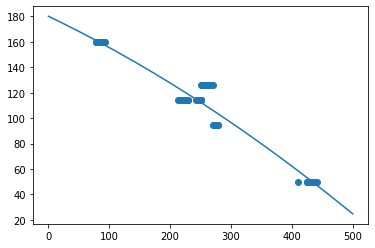

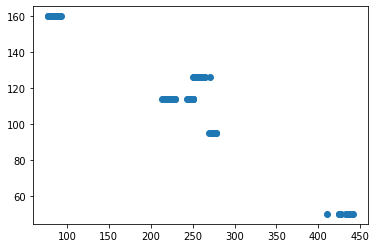

In [31]:
mymodel = np.poly1d(np.polyfit(x, y, 2))
myline = np.linspace(0, 500, num=20000)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()
plt.scatter(x, y)
plt.show()

In [19]:
A = mymodel[0]
B = mymodel[1]
C = mymodel[2]

In [32]:
x = calibration_data["pixel"].to_numpy()
y = calibration_data["real"].to_numpy()
A,B,C = np.polyfit(x, y, 2)

In [33]:
A

-0.0001612723204521041

In [34]:
B

-0.23012162009342785

In [35]:
C

180.10792676079961

## Real time analysis

In [36]:
#read the csv
import pandas as pd
import numpy as np

data = pd.read_csv("2_0908-Trial_SSMdata_Analysis.csv")
data


,No,distance,VrOriSSM,speed,modeSSMOri,modeCollab,x,y,z
0,1,1550.18,0,0,2,3,456.42,-39.88,297.88
1,2,1550.18,0,0,3,4,455.62,-65.18,301.54
2,3,1550.18,0,0,3,4,454.82,-92.64,305.18
3,4,1237.62,0,250,2,3,454.79,-93.81,305.30
4,5,1252.89,0,250,2,3,453.69,-130.93,310.35
...,...,...,...,...,...,...,...,...,...
730,731,1614.76,0,0,3,4,435.93,253.77,48.40
731,732,1634.90,0,250,2,3,435.93,253.77,70.81
732,733,1614.76,0,250,2,3,435.94,253.77,99.05
733,734,1580.51,0,250,2,3,435.94,253.77,132.85


In [37]:
selectData = data[["No", "distance", "VrOriSSM", "speed", "modeSSMOri", "modeCollab", "x", "y", "z"]]
selectData = data.iloc[0:735, 0:9]

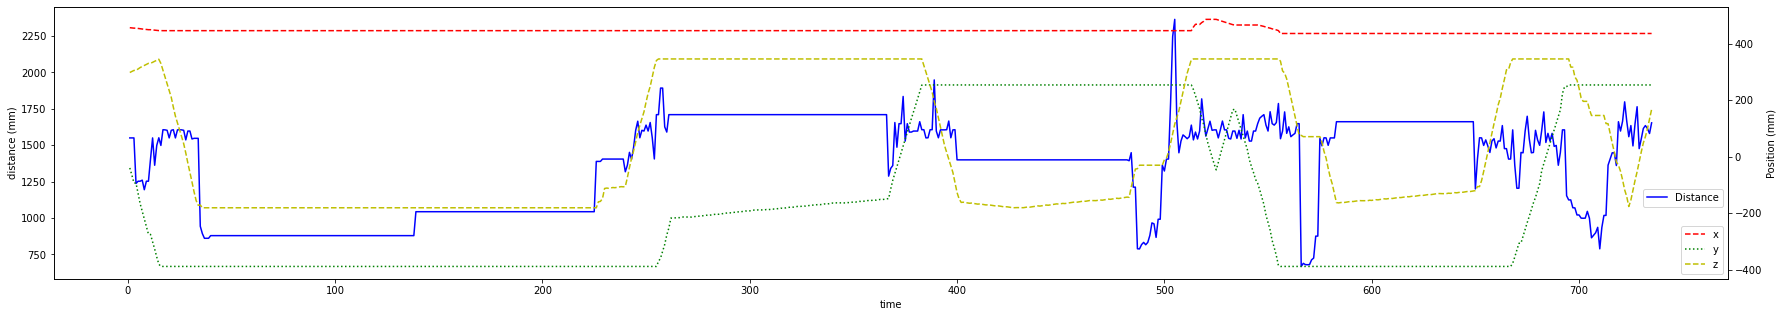

In [38]:
# combine two image
import matplotlib.pyplot as plt
import pylab
import numpy as np



x = selectData["No"].to_numpy()
y1 = selectData["distance"].to_numpy()
y2 = selectData["VrOriSSM"].to_numpy()
y3 = selectData["modeSSMOri"].to_numpy()

y4 = selectData["speed"].to_numpy()

y5 = selectData["x"].to_numpy()
y6 = selectData["y"].to_numpy()
y7 = selectData["z"].to_numpy()

fig, ax1 = plt.subplots()

fig.set_figwidth(30)
fig.set_figheight(5)

ax2 = ax1.twinx()
ax1.plot(x, y1,'b')
ax2.plot(x, y5,'--r')
ax2.plot(x, y6,':g')
ax2.plot(x, y7,'--y')

ax1.set_xlabel('time')
ax1.set_ylabel('distance (mm)')
ax2.set_ylabel('Position (mm)')

ax1.legend(['Distance'], loc='upper right', bbox_to_anchor=(1, 0.35))
ax2.legend(['x', 'y', 'z'], loc = 'lower right')

plt.show()

#pylab.plot(x, y1, '-b', label = 'Distance')
#pylab.plot(x, y2, '-r', label = 'Vr Original SSM')
#pylab.plot(x, y3, '--g', label = 'Vr Modified SSM')
#pylab.legend(loc = 'upper right')
pylab.savefig('distanceXYZ_matplot.png')

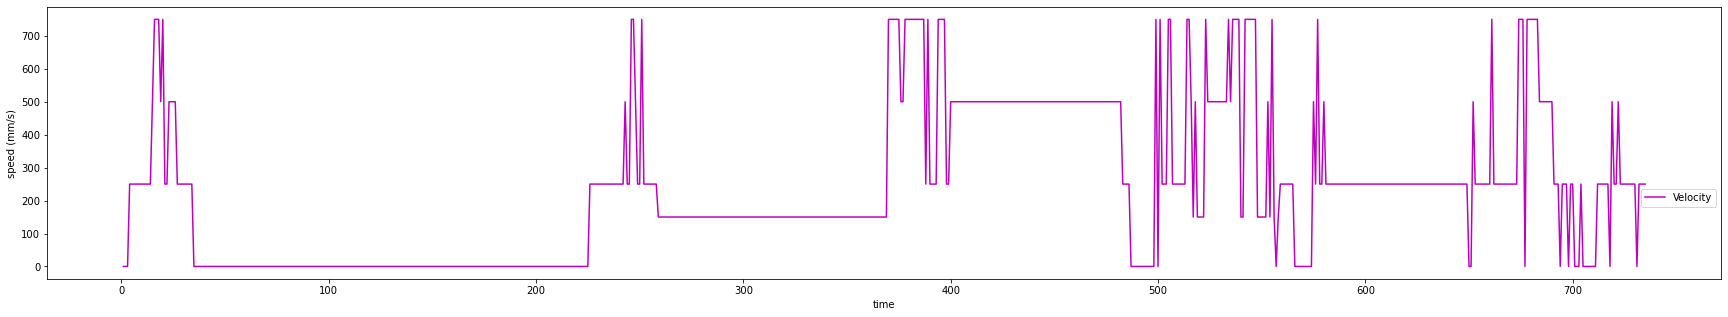

In [39]:
x = selectData["No"].to_numpy()
y1 = selectData["distance"].to_numpy()
y2 = selectData["VrOriSSM"].to_numpy()
y3 = selectData["modeSSMOri"].to_numpy()

y4 = selectData["speed"].to_numpy()

y5 = selectData["x"].to_numpy()
y6 = selectData["y"].to_numpy()
y7 = selectData["z"].to_numpy()

fig, ax1 = plt.subplots()

fig.set_figwidth(30)
fig.set_figheight(5)

ax1.plot(x, y4,'m')

ax1.set_xlabel('time')
ax1.set_ylabel('speed (mm/s)')

ax1.legend(['Velocity'], loc='upper right', bbox_to_anchor=(1, 0.35))
#ax2.legend(['x', 'y', 'z'], loc = 'lower right')

plt.show()
pylab.savefig('velocity_matplot.png')